In [1]:
import numpy as np
import awkward as ak
import uproot
import mplhep as hep
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
from pathlib import Path

%load_ext autoreload
%autoreload 2
import laserball_analysis as ana

hep.styles.use("ROOT")

In [20]:
run_num = 124
trees = f"/nfs/disk1/eos/gold_run_ntuples/run{run_num}/*.ntuple.root:output"
pmtinfo = ana.PMTInfo(f'/nfs/disk1/eos/gold_run_ntuples/run{run_num}/eos_data-deployed_source-laserball-run-{run_num}.0.ntuple.root')

tofs = pmtinfo.time_of_flight(np.asarray([0, 0, 0]))

old_delays = [
    111.1921, 107.7210, 108.0098, 106.4065, 108.4733, 108.3963, 108.2600,
    -1.0000, -1.0000, 108.0301, 107.2648, 108.7493, 107.6719, 109.8190,
    105.8209, -1.0000, 108.1096, 108.4112, 108.9475, 107.8491, 111.0554,
    109.4923, 108.3628, 107.6366, 108.2439, 107.6173, 109.7778, 109.0354,
    -1.0000, 108.7045, 106.8688, -1.0000, 107.8366, 109.5037, 107.9817,
    109.9750, 109.1102, 107.7397, 106.4626, 106.8750, -1.0000, 107.9832,
    107.6946, 159.2714, 106.8101, 106.9118, -1.0000, -1.0000, 108.4735,
    109.1175, 104.8237, 106.8166, 110.6617, 108.0695, 108.5542, 109.3918,
    108.4140, 106.6448, 106.8717, 108.1238, 106.7034, 107.0933, 105.6661,
    -1.0000, 107.9478, 106.8143, 106.1650, 108.0052, 109.7966, 109.3469,
    107.9332, 110.2274, 108.3021, 108.9920, 108.6631, 110.4143, 109.9103,
    108.4637, 106.8076, -1.0000, 108.3983, 105.1852, 109.2893, 110.1767,
    109.2763, 106.1969, 106.0755, 107.4960, 108.3522, 104.0283, 103.9680,
    136.8635, 109.2038, 108.4020, 107.7472, -1.0000, 107.1071, 105.9572,
    109.6355, 109.5951, 107.1494, 108.2980, 109.8422, 107.6856, 105.0806,
    108.7882, 108.7546, 106.9956, 107.5630, 106.7037, 107.2744, -1.0000,
    105.4444, 107.2500, 105.6874, 107.5704, 106.0147, 105.2128, 105.5488,
    105.9189, 106.6554, 107.2519, -0.7171, 107.2877, -1.0000, -1.0000,
    -1.0000, -1.0000, 107.5687, 108.2470, 107.5095, 108.8996, 108.1867,
    108.2685, 108.1497, 107.2439, 107.8277, 108.6608, 107.9066, 106.3903,
    107.0956, 109.1016, -1.0000, -1.0000, 106.1526, 108.3830, 109.3166,
    108.0820, 108.4767, 108.9215, 109.0096, 107.0980, 107.2181, 108.5722,
    106.2419, 109.5613, 109.2762, 106.3790, 108.8079, -1.0000, 108.1878,
    110.6955, 108.8605, 108.0259, 110.0854, 108.5670, 106.3149, 111.4902,
    108.5931, 109.1826, 109.2063, 106.4855, 108.4106, 106.9741, 108.2170,
    -1.0000, 91.6384, 91.4876, -1.0000, 5.4702, 91.0885, 94.0089, 90.4380,
    92.4205, 90.7265, 94.5513, 90.7886, 90.4789, 91.1508, 94.7845, 92.0266,
    -1.0000, -1.0000, 88.4654, 84.4453, 82.4979, 88.0686, -1.0000, 86.5340,
    86.6076, 3.6000, 84.1584, 86.2430, 86.4537, 108.4010, 109.8969,
    109.2272, -1.0000, -1.0000, 86.0620, 86.0641, 84.3468, -1.0000, 88.4547,
    86.4686, 86.1195, -1.0000, 88.1248, -1.0000, 86.3671, -1.0000, -1.0000,
    -1.0000, -1.0000, 105.9497, 106.8818, 107.7968, 105.2444, 106.6690,
    104.0546, 106.7309, 105.6941, 103.9789, 105.6339, 107.2393, 106.0007,
    -1.0000, -1.0000, -1.0000, -1.0000, 105.9031, 106.7242, 104.9575,
    104.6693, 105.4346, 107.6623, 103.6205, 105.9685, 57.0752, 106.5509,
    105.6809, 105.5141, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
    -1.0000, 116.0784, 119.0944, -1.0000, 121.8450, 121.2876, -1.0000,
    -1.0000, 115.9678, 119.6537, 115.7267, -1.0000, -1.0000, -1.0000,
    -1.0000
  ]

new_delays = [121.8553,118.2529,118.5720,116.9500,119.0171,119.0623,119.1158,-1.0000,-1.0000,118.4994,118.1410,119.4500,118.2106,120.4640,116.3527,-1.0000,118.6759,118.9606,119.4684,118.3591,121.5596,120.0685,118.9285,118.1869,118.7671,118.1481,120.3391,119.5294,-1.0000,119.2390,117.4172,-1.0000,118.1714,120.0276,118.5602,120.5602,119.6432,118.2649,117.0275,117.5833,-1.0000,118.5303,118.3458,-1.0000,117.5117,117.5626,-1.0000,-1.0000,119.0732,119.4250,115.3905,117.6283,121.3212,118.4936,119.2650,120.0254,119.1425,117.2747,117.5720,118.6432,117.3418,117.6318,116.1640,-1.0000,118.3813,117.5208,116.6591,118.5410,120.3719,119.9667,118.5667,120.8482,118.8801,119.5995,119.3774,120.9895,120.5547,118.9449,117.4230,-1.0000,118.9685,116.1618,119.7830,120.8481,119.7642,116.8050,116.5825,118.0823,118.9425,114.6157,114.4931,-1.0000,119.7537,118.9533,118.2739,-1.0000,117.7060,116.5349,120.2011,120.1196,118.1110,118.8936,120.3861,118.2320,115.6460,119.2762,119.5929,117.6030,118.1222,117.3003,117.7738,-1.0000,116.1390,117.9285,116.1729,118.1788,116.5835,115.7470,116.3816,116.8391,117.3695,118.3981,-1.0000,118.3424,-1.0000,-1.0000,-1.0000,-1.0000,118.1247,118.8953,118.1118,119.5757,118.7984,118.9087,119.0641,117.6664,118.4360,119.3288,118.3752,116.9784,117.7291,119.5097,-1.0000,-1.0000,116.7218,118.9488,119.8324,118.7058,119.0810,119.4789,119.9231,117.9322,117.9083,119.1604,116.7857,120.1885,119.6319,116.9998,119.5894,-1.0000,118.7662,121.4105,119.4780,118.7522,120.6520,119.1786,116.9133,122.0955,119.3673,119.7087,119.7203,117.1349,118.9070,117.7093,118.7374,-1.0000,102.1894,102.0544,-1.0000,-1.0000,101.5448,104.5488,101.0092,103.2443,101.6358,105.1448,101.7330,101.3426,101.6529,105.5385,102.5586,-1.0000,-1.0000,98.3655,93.9829,93.6526,98.4324,-1.0000,97.3134,97.6113,-1.0000,94.4196,96.1109,97.5382,118.9370,120.3691,119.7565,-1.0000,-1.0000,95.6208,95.6755,94.9003,-1.0000,98.4598,97.6070,97.2054,-1.0000,97.5926,-1.0000,97.4447,-1.0000,-1.0000,-1.0000,-1.0000,116.2873,117.8609,118.6359,116.4064,117.7798,115.4628,117.7819,116.2491,114.5966,116.5598,117.3808,117.0382,-1.0000,-1.0000,-1.0000,-1.0000,116.4285,117.4177,115.3187,115.5744,115.9842,118.8733,113.9887,116.9376,-1.0000,117.1128,115.9406,116.1047,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,127.0794,129.7417,-1.0000,132.5462,131.9013,-1.0000,-1.0000,127.5922,131.5231,126.1580,-1.0000,-1.0000,-1.0000,-1.0000,]

old_delays = np.asarray(old_delays)
new_delays = np.asarray(new_delays)
def get_tresid(batch):
    return batch['fitTime'] - [tofs[ev] for ev in batch['digitPMTID']] + [old_delays[ev] for ev in batch['digitPMTID']] - [new_delays[ev] for ev in batch['digitPMTID']]


bins, edges = ana.aggregate_histogram(trees, branch_name=get_tresid,
                                      expressions=["fitTime", "digitNCrossings", "digitPMTID"],
                                      bin_params={"bins": np.arange(-100, 100)},
                                      cut_func=lambda batch: batch['digitNCrossings'] == 1)


/nfs/disk1/eos/gold_run_ntuples/run124/*.ntuple.root:output: 100%|█| 499157/499157 [00:45<00:00, 10951.68


(-50.0, 50.0)

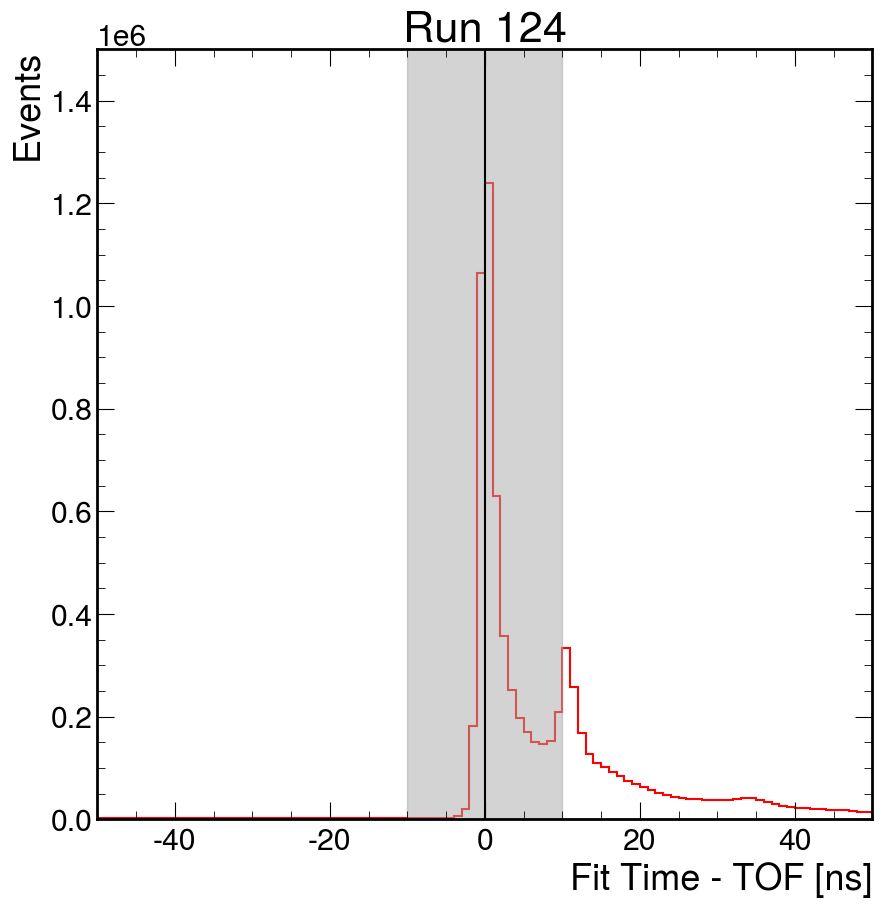

In [22]:
hep.histplot(bins, edges, color='r')
plt.title(f"Run {run_num}")
plt.axvline(0.0, color='k')
plt.xlabel("Fit Time - TOF [ns]")
plt.ylabel("Events")
plt.fill_between([-10, 10], 0, 2e6, alpha=0.5, color='darkgray')
plt.ylim(0, 1.5e6)
plt.xlim(-50, 50)


/nfs/disk1/eos/gold_run_ntuples/run46/*.ntuple.root:output:   0%|                                                                                                                                                                                 | 0/100000 [00:00<?, ?event/s]
/nfs/disk1/eos/gold_run_ntuples/run46/*.ntuple.root:output:   1%|█▎                                                                                                                                                                   | 800/100000 [00:00<00:15, 6587.04event/s]
/nfs/disk1/eos/gold_run_ntuples/run46/*.ntuple.root:output:   3%|████▌                                                                                                                                                              | 2800/100000 [00:00<00:07, 13212.90event/s]
/nfs/disk1/eos/gold_run_ntuples/run46/*.ntuple.root:output:   5%|███████▊                                                                                                           

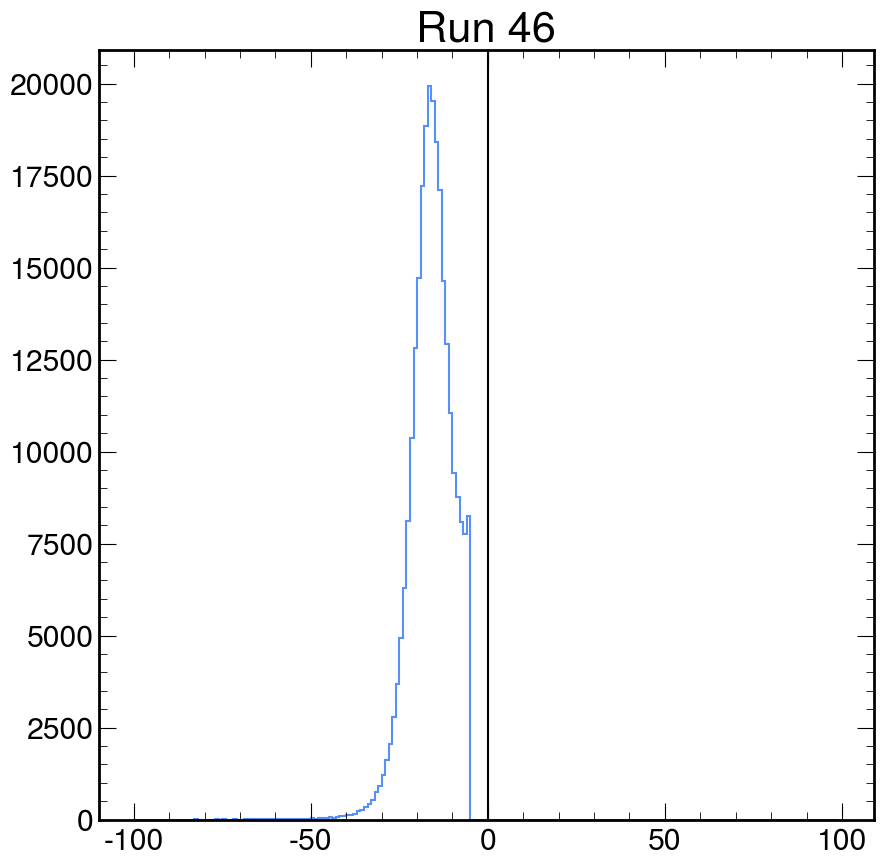

In [17]:
run_num = 46
trees = f"/nfs/disk1/eos/gold_run_ntuples/run{run_num}/*.ntuple.root:output"
pmtinfo = ana.PMTInfo(f'/nfs/disk1/eos/gold_run_ntuples/run{run_num}/eos_data-deployed_source-laserball-run-{run_num}.0.ntuple.root')


bins, edges = ana.aggregate_histogram(trees, branch_name='digitPeak',
                                      expressions=["digitPeak", "digitNCrossings"],
                                      bin_params={"bins": np.arange(-100, 100)},
                                      cut_func=lambda batch: batch['digitNCrossings'] == 1)
hep.histplot(bins, edges)
plt.title(f"Run {run_num}")
plt.axvline(0.0, color='k')


/nfs/disk1/users/jierans/eos/eos_laserball_sims/eos_pbomb_514nm_100_down.ntuple.root:output:   0%|                                                                                                                                                | 0/250000 [00:00<?, ?event/s]
/nfs/disk1/users/jierans/eos/eos_laserball_sims/eos_pbomb_514nm_100_down.ntuple.root:output: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250000/250000 [00:07<00:00, 33243.81event/s]


Text(1, 0, 'Fit Time - TOF')

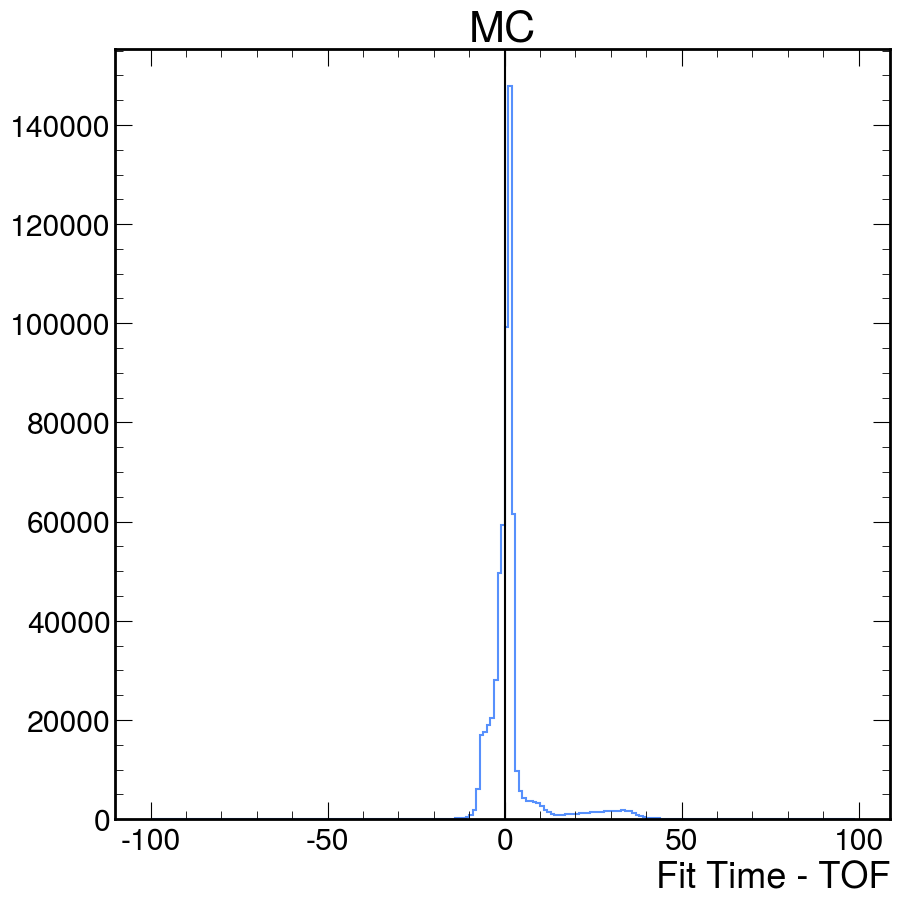

In [28]:
trees = "/nfs/disk1/users/jierans/eos/eos_laserball_sims/eos_pbomb_514nm_100_down.ntuple.root:output"

def get_tresid(batch):
    return batch['fitTime'] - [tofs[ev] for ev in batch['digitPMTID']] - 6


bins, edges = ana.aggregate_histogram(trees, branch_name=get_tresid,
                                      expressions=["fitTime", "digitNCrossings", "digitPMTID"],
                                      bin_params={"bins": np.arange(-100, 100)},
                                      cut_func=lambda batch: batch['digitNCrossings'] == 1)
hep.histplot(bins, edges)
plt.title("MC")
plt.axvline(0.0, color='k')
plt.xlabel("Fit Time - TOF")

/nfs/disk1/users/jierans/eos/eos_laserball_sims/eos_pbomb_442nm_0_down.ntuple.root:output: 100%|█| 100000
/nfs/disk1/eos/gold_run_ntuples/run124/*.ntuple.root:output: 100%|█| 499157/499157 [00:02<00:00, 209705.3


Text(0, 1, 'Normalized Events [A.U.]')

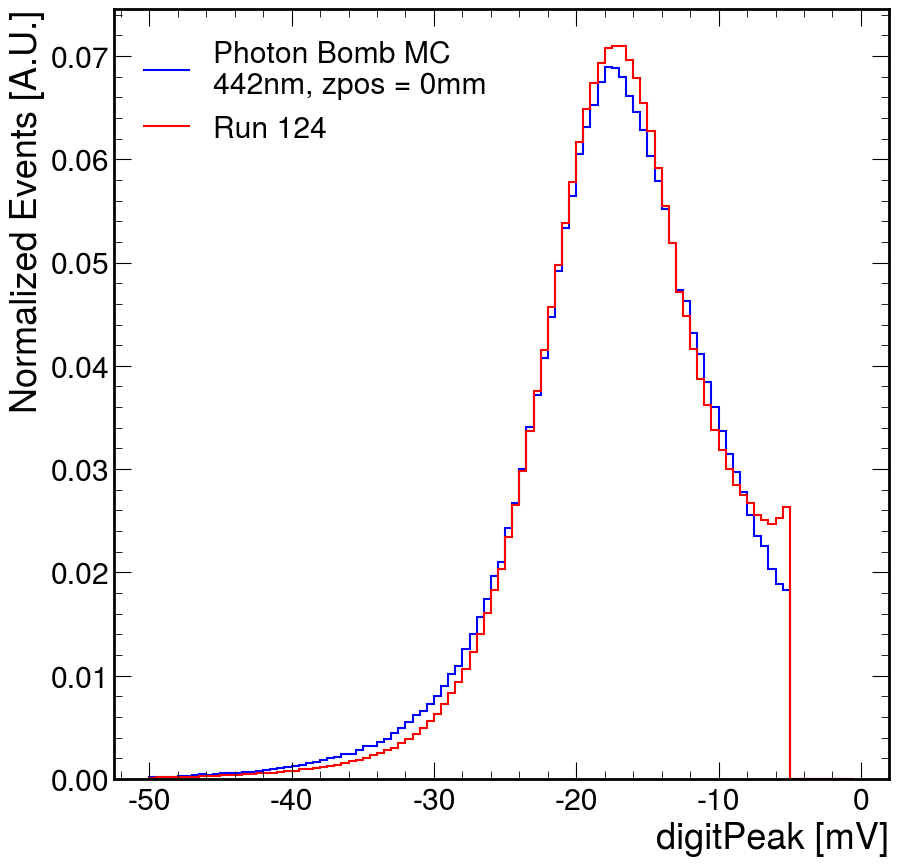

In [18]:
trees = "/nfs/disk1/users/jierans/eos/eos_laserball_sims/eos_pbomb_442nm_0_down.ntuple.root:output"


bins, edges = ana.aggregate_histogram(trees, branch_name="digitPeak",
                                      expressions=["digitPeak", "digitNCrossings"],
                                      bin_params={"bins": np.arange(-50, 0, 0.5)},
                                      cut_func=lambda batch: batch['digitNCrossings'] == 1)
hep.histplot(bins, edges, label='Photon Bomb MC\n442nm, zpos = 0mm', density=True, color='b')

trees = f"/nfs/disk1/eos/gold_run_ntuples/run{run_num}/*.ntuple.root:output"


bins, edges = ana.aggregate_histogram(trees, branch_name="digitPeak",
                                      expressions=["digitPeak", "digitNCrossings"],
                                      bin_params={"bins": np.arange(-50, 0, 0.5)},
                                      cut_func=lambda batch: batch['digitNCrossings'] == 1)
hep.histplot(bins, edges, label="Run 124", density=True, color='r')
plt.xlabel("digitPeak [mV]")
plt.legend()
plt.ylabel("Normalized Events [A.U.]")
# plt.axvline(0.0, color='k')
# plt.axvline(0.0, color='k')
# plt.xlabel("Fit Time - TOF")